In [23]:
import numpy as np
import pandas as pd


In [24]:
##Importação dos dados de treino

In [25]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_5988\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_5988\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_5988\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [26]:
##Remoção de valores nulos

In [27]:
fd001_train = fd001_train.dropna()
fd001_test = fd001_test.dropna()

In [28]:
##Introdução do cabeçalho do data frame

In [29]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [30]:
##Geração de Histogramas e seleção de variáveis

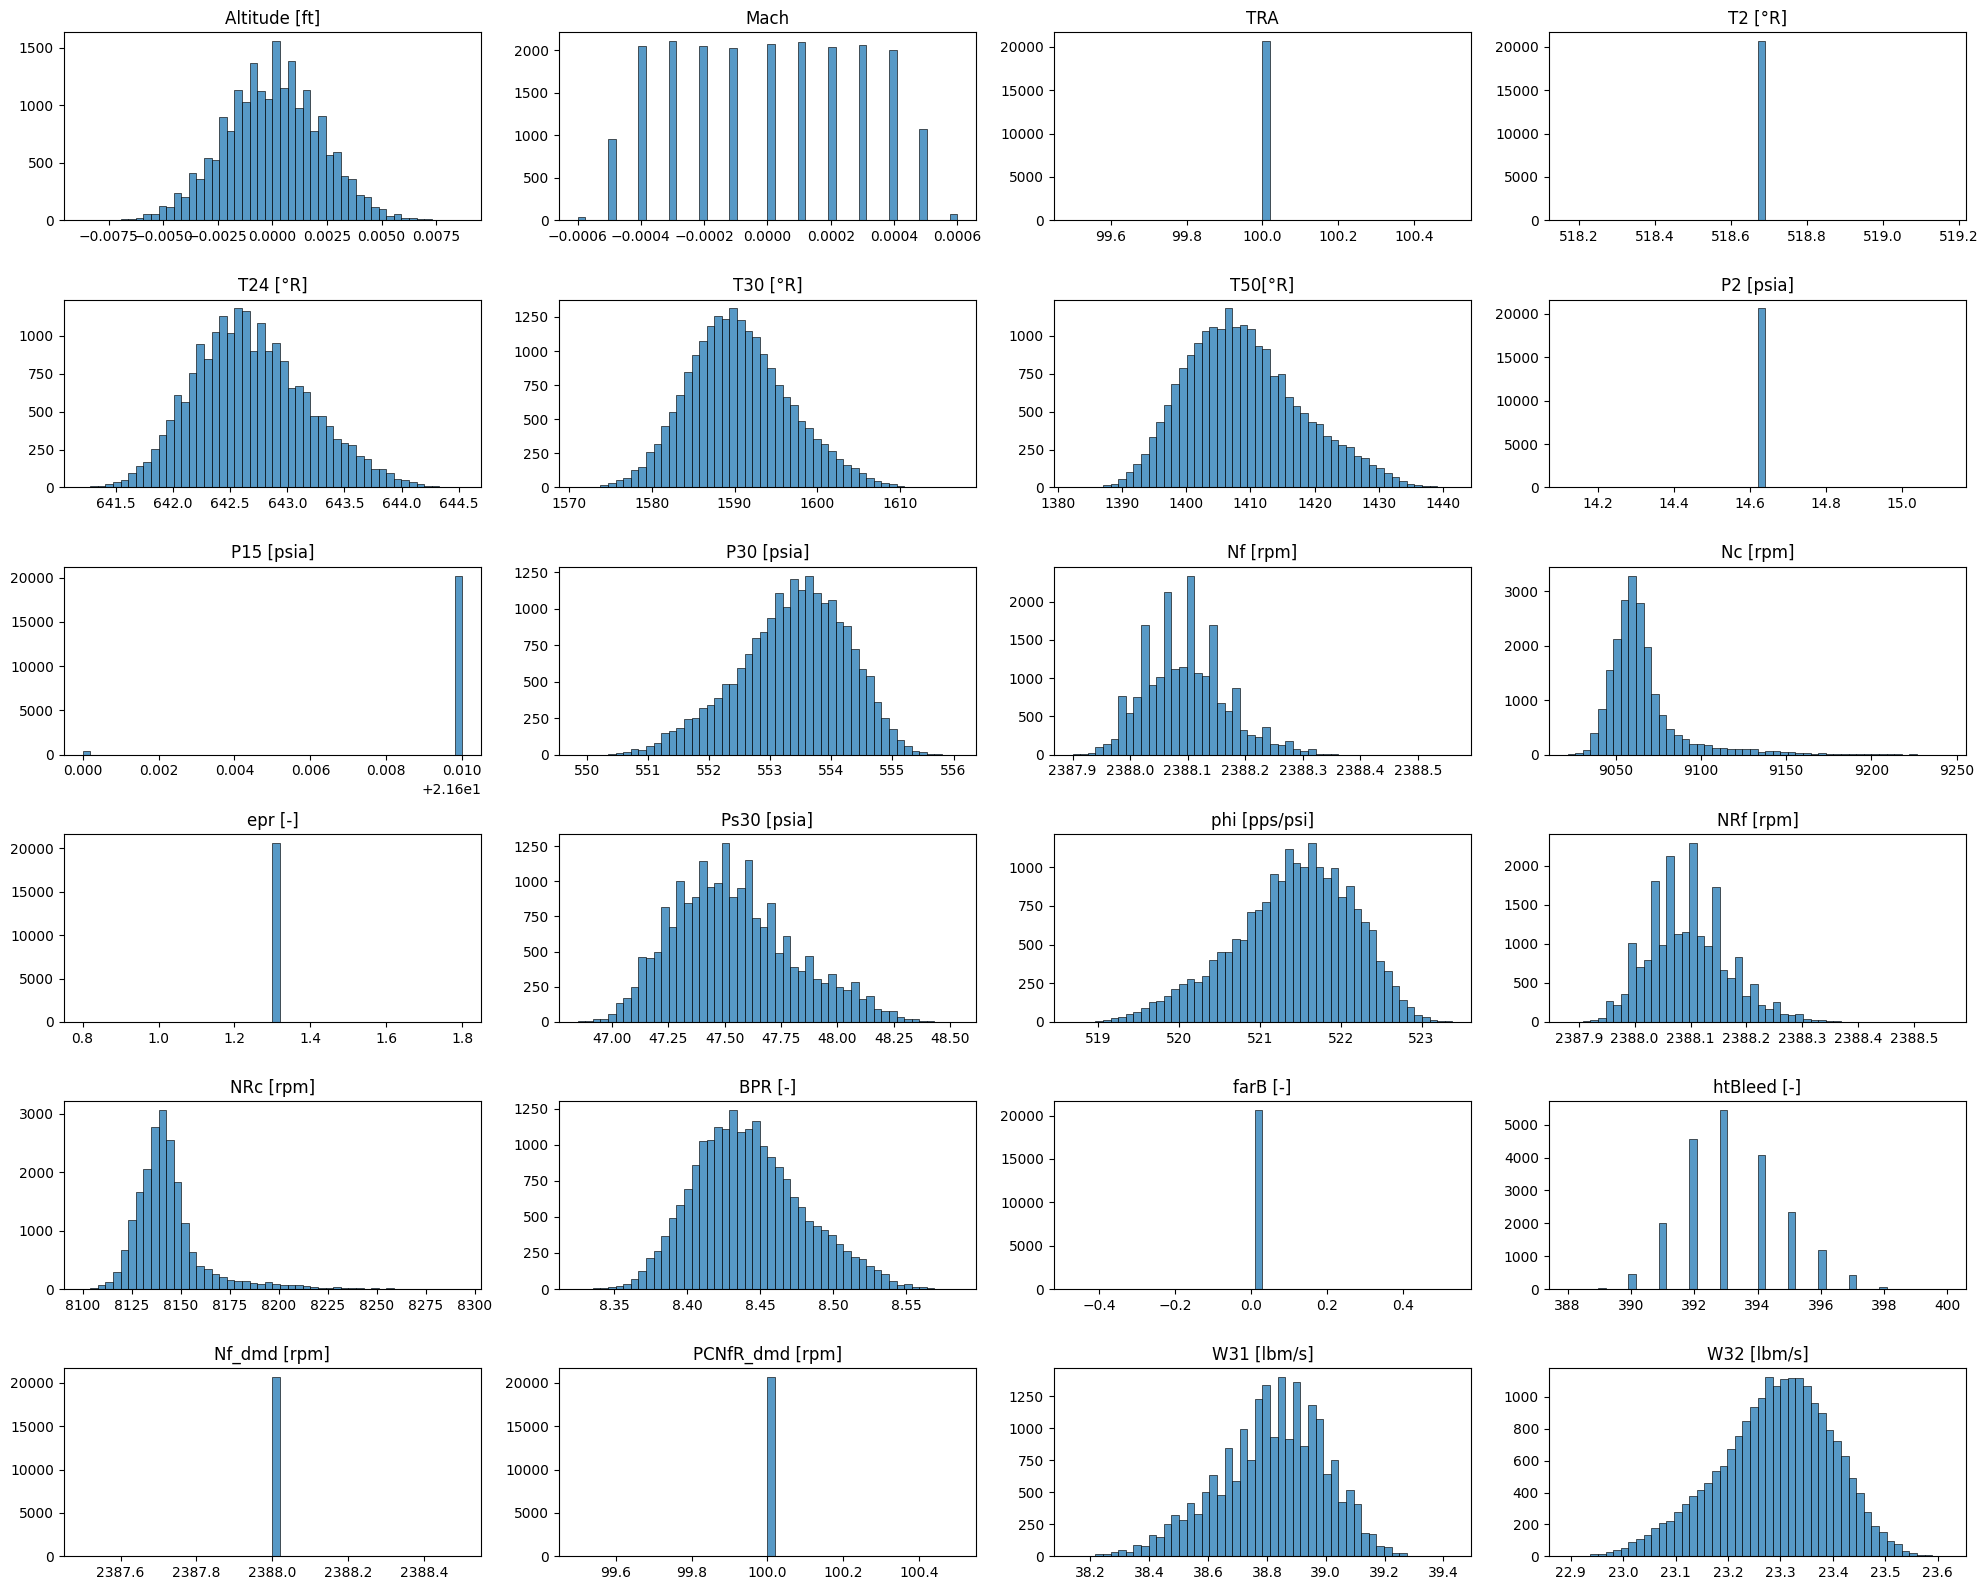

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [32]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]' ,'epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]','P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [33]:
##Normalização 

In [34]:
from sklearn.preprocessing import MinMaxScaler

features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [35]:
##Definição dos targets para regressão nos dados de treino

In [36]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [37]:
##Visualização de um ciclo de vida de um motor 

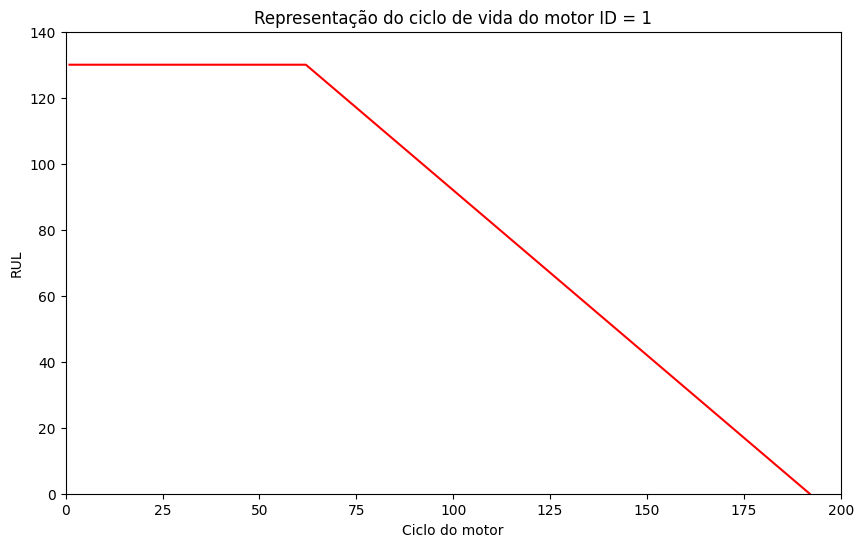

In [38]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [39]:
##Definição dos targets para regressão nos dados de teste 

In [40]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [41]:
##Criação das janelas de tempo para dados de treino e de teste

In [42]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [43]:
##Separação das variáveis de treino e teste

In [44]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [45]:
##Criação do modelo LSTM

In [46]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape1 = (x1.shape[1], x1.shape[2])

def build_model_lstm(hp):
    model=Sequential()
    n_layers_lstm=hp.Int('layers_lstm',1,3)
    n_layers_dense=hp.Int('layers_dense',1,3)
    model.add(LSTM(hp.Choice('lstm_0',[32,64,128,256]),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1))
    model.add(Dropout(hp.Choice('dropout_0',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_lstm):
        return_seq = i <n_layers_lstm -1
        model.add(LSTM(hp.Choice(f'lstm_{i+1}',[32,64,128,256]),
                       activation='tanh',
                       return_sequences=return_seq))
        model.add(Dropout(hp.Choice(f'dropout_{i+1}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense):
        model.add(Dense(hp.Choice(f'dense_{i}',[32,64,128,256]),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_lstm = keras_tuner.BayesianOptimization(build_model_lstm,
                           objective='val_loss',
                           max_trials=10,
                           directory='C:/Users/davim/keras',
                           project_name='hyper_lstm',
                           overwrite=True)

tuner_lstm.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_lstm=tuner_lstm.get_best_models(num_models=1)[0]
best_trial=tuner_lstm.oracle.get_best_trials(num_trials=1)[0]
param_lstm=best_trial.hyperparameters.get_config()['values']
n_lstm = int(param_lstm.get('layers_lstm',1))+1
n_dense=int(param_lstm.get('layers_dense',1))+1
best_param_lstm = {}

for k in range(n_lstm):
    key1=f'lstm_{k}'
    key2 = f'dropout_{k}'
    best_param_lstm[key1] = param_lstm[key1]
    best_param_lstm[key2] = param_lstm[key2] 

for k in range(n_dense):
    key3=f'dense_{k}'
    if k < n_dense-1:
        best_param_lstm[key3] = param_lstm[key3]
    else:
        best_param_lstm[key3] = 1

best_param_lstm['learning_rate'] = param_lstm['learning_rate']
print(f'n_lstm = {n_lstm}, n_dense = {n_dense}')
for k,v in best_param_lstm.items():
    print(f'{k:15s} -> {v}')

Trial 10 Complete [00h 10m 45s]
val_loss: 1891.575439453125

Best val_loss So Far: 215.07241821289062
Total elapsed time: 01h 37m 13s
n_lstm = 2, n_dense = 3
lstm_0          -> 128
dropout_0       -> 0.30000000000000004
lstm_1          -> 128
dropout_1       -> 0.5000000000000001
dense_0         -> 64
dense_1         -> 256
dense_2         -> 1
learning_rate   -> 0.001


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [47]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 288ms/step - loss: 251.8842 - mean_absolute_error: 11.8628 - mean_squared_error: 251.8842

71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 329ms/step - loss: 237.1804 - mean_absolute_error: 11.5373 - mean_squared_error: 237.1804 - val_loss: 300.9478 - val_mean_absolute_error: 13.5639 - val_mean_squared_error: 300.9478
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - loss: 226.7386 - mean_absolute_error: 11.2512 - mean_squared_error: 226.7386

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 294ms/step - loss: 231.0329 - mean_absolute_error: 11.3329 - mean_squared_error: 231.0329 - val_loss: 207.9476 - val_mean_absolute_error: 11.1179 - val_mean_squared_error: 207.9476
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 224.8039 - mean_absolute_error: 11.1291 - mean_squared_error: 224.8039

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - loss: 223.5633 - mean_absolute_error: 11.1222 - mean_squared_error: 223.5633 - val_loss: 201.7949 - val_mean_absolute_error: 10.5312 - val_mean_squared_error: 201.7949
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 227.2270 - mean_absolute_error: 11.2225 - mean_squared_error: 227.2270

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 295ms/step - loss: 221.4268 - mean_absolute_error: 11.1055 - mean_squared_error: 221.4269 - val_loss: 195.9832 - val_mean_absolute_error: 10.5488 - val_mean_squared_error: 195.9832
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 216.2647 - mean_absolute_error: 10.9619 - mean_squared_error: 216.2647

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 296ms/step - loss: 218.7270 - mean_absolute_error: 11.0204 - mean_squared_error: 218.7270 - val_loss: 193.5142 - val_mean_absolute_error: 10.7754 - val_mean_squared_error: 193.5142
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - loss: 209.2035 - mean_absolute_error: 10.7403 - mean_squared_error: 209.2035

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 296ms/step - loss: 216.7065 - mean_absolute_error: 10.9274 - mean_squared_error: 216.7065 - val_loss: 184.1515 - val_mean_absolute_error: 10.2774 - val_mean_squared_error: 184.1515
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 204.0382 - mean_absolute_error: 10.6499 - mean_squared_error: 204.0382

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 289ms/step - loss: 209.9508 - mean_absolute_error: 10.7861 - mean_squared_error: 209.9508 - val_loss: 304.6206 - val_mean_absolute_error: 13.7012 - val_mean_squared_error: 304.6206
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 217.3338 - mean_absolute_error: 11.0212 - mean_squared_error: 217.3338

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 291ms/step - loss: 211.4395 - mean_absolute_error: 10.8155 - mean_squared_error: 211.4395 - val_loss: 197.4774 - val_mean_absolute_error: 11.1391 - val_mean_squared_error: 197.4774
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step - loss: 214.0935 - mean_absolute_error: 10.8539 - mean_squared_error: 214.0935

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 291ms/step - loss: 213.5747 - mean_absolute_error: 10.8198 - mean_squared_error: 213.5747 - val_loss: 181.4957 - val_mean_absolute_error: 10.0532 - val_mean_squared_error: 181.4957
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - loss: 205.0833 - mean_absolute_error: 10.6570 - mean_squared_error: 205.0833

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 291ms/step - loss: 206.0464 - mean_absolute_error: 10.6618 - mean_squared_error: 206.0464 - val_loss: 180.9937 - val_mean_absolute_error: 10.5740 - val_mean_squared_error: 180.9937
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 209.2980 - mean_absolute_error: 10.8382 - mean_squared_error: 209.2980

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 293ms/step - loss: 204.1690 - mean_absolute_error: 10.6429 - mean_squared_error: 204.1690 - val_loss: 215.4764 - val_mean_absolute_error: 11.5259 - val_mean_squared_error: 215.4764
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - loss: 211.0635 - mean_absolute_error: 10.7312 - mean_squared_error: 211.0635

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 212ms/step - loss: 206.6016 - mean_absolute_error: 10.6138 - mean_squared_error: 206.6016 - val_loss: 175.2214 - val_mean_absolute_error: 10.0675 - val_mean_squared_error: 175.2214
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 198.6740 - mean_absolute_error: 10.4540 - mean_squared_error: 198.6740

71/71 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 196.7838 - mean_absolute_error: 10.4222 - mean_squared_error: 196.7838 - val_loss: 194.2309 - val_mean_absolute_error: 10.8424 - val_mean_squared_error: 194.2309
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - loss: 203.2330 - mean_absolute_error: 10.5606 - mean_squared_error: 203.2330

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 119ms/step - loss: 199.4232 - mean_absolute_error: 10.4801 - mean_squared_error: 199.4232 - val_loss: 206.7004 - val_mean_absolute_error: 11.3535 - val_mean_squared_error: 206.7004
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 194.5180 - mean_absolute_error: 10.3431 - mean_squared_error: 194.5180

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 196.5118 - mean_absolute_error: 10.3853 - mean_squared_error: 196.5118 - val_loss: 194.3584 - val_mean_absolute_error: 10.9042 - val_mean_squared_error: 194.3584
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 197.2266 - mean_absolute_error: 10.3912 - mean_squared_error: 197.2266

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 193.9571 - mean_absolute_error: 10.2881 - mean_squared_error: 193.9571 - val_loss: 161.3402 - val_mean_absolute_error: 9.2859 - val_mean_squared_error: 161.3402
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 195.4601 - mean_absolute_error: 10.3681 - mean_squared_error: 195.4601

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 190.7891 - mean_absolute_error: 10.2255 - mean_squared_error: 190.7891 - val_loss: 172.7606 - val_mean_absolute_error: 10.1341 - val_mean_squared_error: 172.7606
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 188.1337 - mean_absolute_error: 10.2218 - mean_squared_error: 188.1337

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 114ms/step - loss: 189.3311 - mean_absolute_error: 10.2050 - mean_squared_error: 189.3311 - val_loss: 183.2972 - val_mean_absolute_error: 9.7469 - val_mean_squared_error: 183.2972
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 191.4499 - mean_absolute_error: 10.1745 - mean_squared_error: 191.4499

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 113ms/step - loss: 191.2866 - mean_absolute_error: 10.1985 - mean_squared_error: 191.2866 - val_loss: 178.1499 - val_mean_absolute_error: 9.7621 - val_mean_squared_error: 178.1499
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 187.5765 - mean_absolute_error: 10.1123 - mean_squared_error: 187.5765

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 184.4799 - mean_absolute_error: 10.0456 - mean_squared_error: 184.4799 - val_loss: 196.0081 - val_mean_absolute_error: 11.0941 - val_mean_squared_error: 196.0081
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - loss: 183.1962 - mean_absolute_error: 10.0368 - mean_squared_error: 183.1962

71/71 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - loss: 180.0814 - mean_absolute_error: 9.9464 - mean_squared_error: 180.0814 - val_loss: 227.1675 - val_mean_absolute_error: 11.6944 - val_mean_squared_error: 227.1675


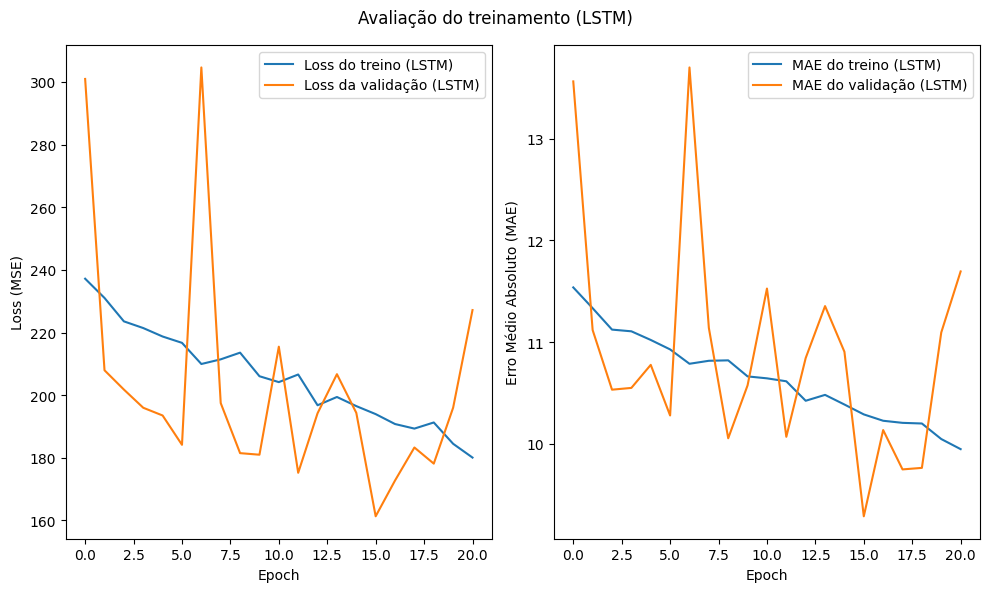

In [48]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=best_model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [49]:
##Testando o modelo com os dados de teste 

In [50]:
rul_prev = best_model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


In [51]:
##Avaliando o modelo

356.388749441391
18.88
0.14889274481762863
15.383712663936727
0.6401333871510513
Tempo de 6165.483153104782s


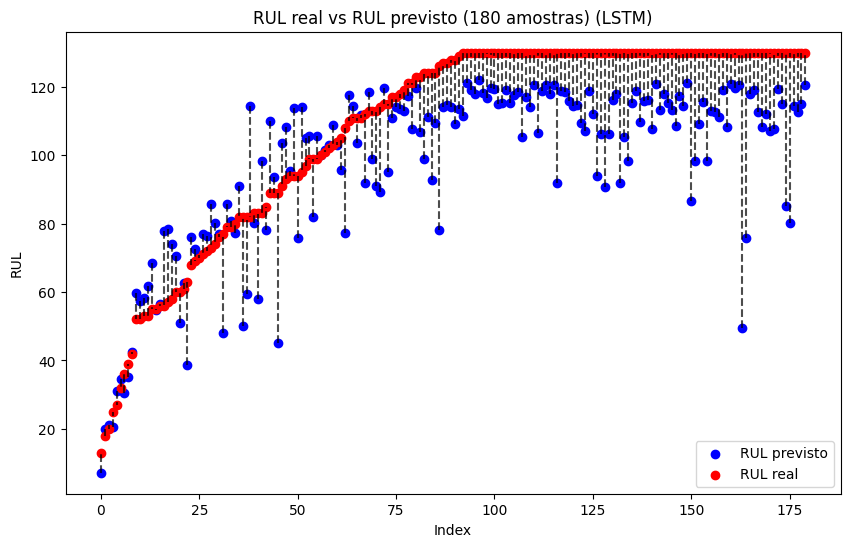

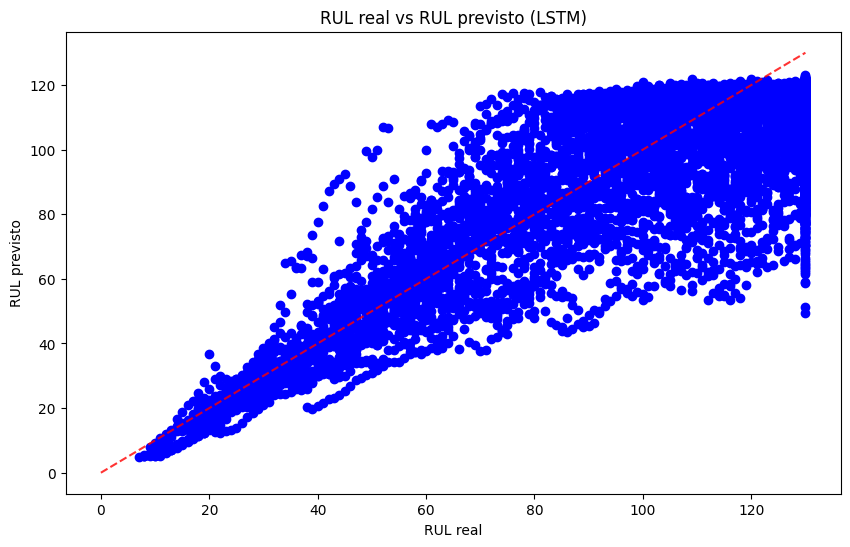

In [52]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [53]:
##Criando modelo BiLSTM

In [54]:
def build_model_bi(hp):
    model=Sequential()
    n_layers_bi=hp.Int('layers_bi',1,3)
    n_layers_dense=hp.Int('layers_dense',1,3)
    model.add(Bidirectional(LSTM(hp.Choice('bi_0',[32,64,128,256]),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1)))
    model.add(Dropout(hp.Choice('dropout_0',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_bi):
        return_seq = i <n_layers_bi -1
        model.add(Bidirectional(LSTM(hp.Choice(f'bi_{i+1}',[32,64,128,256]),
                       activation='tanh',
                       return_sequences=return_seq)))
        model.add(Dropout(hp.Choice(f'dropout_{i+1}',list(np.arange(0.2,0.6,0.1)))))
    for i in range(n_layers_dense):
        model.add(Dense(hp.Choice(f'dense_{i}',[32,64,128,256]),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_bilstm = keras_tuner.BayesianOptimization(build_model_bi,
                           objective='val_loss',
                           max_trials=10,
                           directory='C:/Users/davim/keras',
                           project_name='hyper_bi',
                           overwrite=True)

tuner_bilstm.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_bi=tuner_bilstm.get_best_models(num_models=1)[0]
best_trial=tuner_bilstm.oracle.get_best_trials(num_trials=1)[0]
param_bi = best_trial.hyperparameters.get_config()['values']
n_bi = int(param_bi.get('layers_bi',1))
n_dense = int(param_bi.get('layers_dense',1)) 
best_param_bi={}

for k in range(n_bi):
    key1 = f'bi_{k}'
    key2 = f'dropout_{k}'
    best_param_bi[key1] = param_bi[key1]
    best_param_bi[key2] = param_bi[key2]

for k in range(n_dense):
    key3 =f'dense_{k}'
    if k < n_dense -1:
        best_param_bi[key3] = param_bi[key3]
    else:
        best_param_bi[key3] = 1

best_param_bi['learning_rate'] = param_bi['learning_rate'] 
print(f'n_bi = {n_bi}, n_dense = {n_dense}')
for k,v in best_param_bi.items():
    print(f'{k:15s} -> {v}')

Trial 10 Complete [00h 06m 06s]
val_loss: 278.9311828613281

Best val_loss So Far: 190.2235565185547
Total elapsed time: 01h 11m 14s
n_bi = 3, n_dense = 2
bi_0            -> 256
dropout_0       -> 0.30000000000000004
bi_1            -> 64
dropout_1       -> 0.5000000000000001
bi_2            -> 256
dropout_2       -> 0.30000000000000004
dense_0         -> 128
dense_1         -> 1
learning_rate   -> 0.001


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 32 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [55]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 948ms/step - loss: 273.1850 - mean_absolute_error: 12.0579 - mean_squared_error: 273.1850

71/71 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - loss: 247.2723 - mean_absolute_error: 11.6000 - mean_squared_error: 247.2723 - val_loss: 219.1624 - val_mean_absolute_error: 11.2226 - val_mean_squared_error: 219.1624
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 988ms/step - loss: 226.4163 - mean_absolute_error: 11.2081 - mean_squared_error: 226.4163

71/71 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - loss: 230.9886 - mean_absolute_error: 11.2880 - mean_squared_error: 230.9886 - val_loss: 205.4122 - val_mean_absolute_error: 10.9307 - val_mean_squared_error: 205.4122
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 959ms/step - loss: 236.7602 - mean_absolute_error: 11.4649 - mean_squared_error: 236.7602

71/71 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - loss: 233.3018 - mean_absolute_error: 11.3537 - mean_squared_error: 233.3018 - val_loss: 221.1053 - val_mean_absolute_error: 10.7769 - val_mean_squared_error: 221.1053
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 940ms/step - loss: 229.3375 - mean_absolute_error: 11.1883 - mean_squared_error: 229.3375

71/71 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 227.5029 - mean_absolute_error: 11.1481 - mean_squared_error: 227.5029 - val_loss: 176.2441 - val_mean_absolute_error: 9.3608 - val_mean_squared_error: 176.2441
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 952ms/step - loss: 220.4026 - mean_absolute_error: 10.9386 - mean_squared_error: 220.4026

71/71 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - loss: 226.2223 - mean_absolute_error: 11.1083 - mean_squared_error: 226.2223 - val_loss: 188.5677 - val_mean_absolute_error: 10.3910 - val_mean_squared_error: 188.5677
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 974ms/step - loss: 217.0450 - mean_absolute_error: 10.8977 - mean_squared_error: 217.0450

71/71 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - loss: 222.0416 - mean_absolute_error: 11.0053 - mean_squared_error: 222.0416 - val_loss: 176.5578 - val_mean_absolute_error: 10.0245 - val_mean_squared_error: 176.5578
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 951ms/step - loss: 216.5603 - mean_absolute_error: 10.8670 - mean_squared_error: 216.5603

71/71 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - loss: 222.6283 - mean_absolute_error: 11.0110 - mean_squared_error: 222.6283 - val_loss: 177.7157 - val_mean_absolute_error: 10.0417 - val_mean_squared_error: 177.7157
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 926ms/step - loss: 225.9136 - mean_absolute_error: 11.1098 - mean_squared_error: 225.9136

71/71 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 224.0143 - mean_absolute_error: 11.0389 - mean_squared_error: 224.0143 - val_loss: 184.5805 - val_mean_absolute_error: 9.5367 - val_mean_squared_error: 184.5805
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 950ms/step - loss: 218.2725 - mean_absolute_error: 10.9349 - mean_squared_error: 218.2725

71/71 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - loss: 221.7792 - mean_absolute_error: 11.0283 - mean_squared_error: 221.7792 - val_loss: 180.8628 - val_mean_absolute_error: 9.8669 - val_mean_squared_error: 180.8628


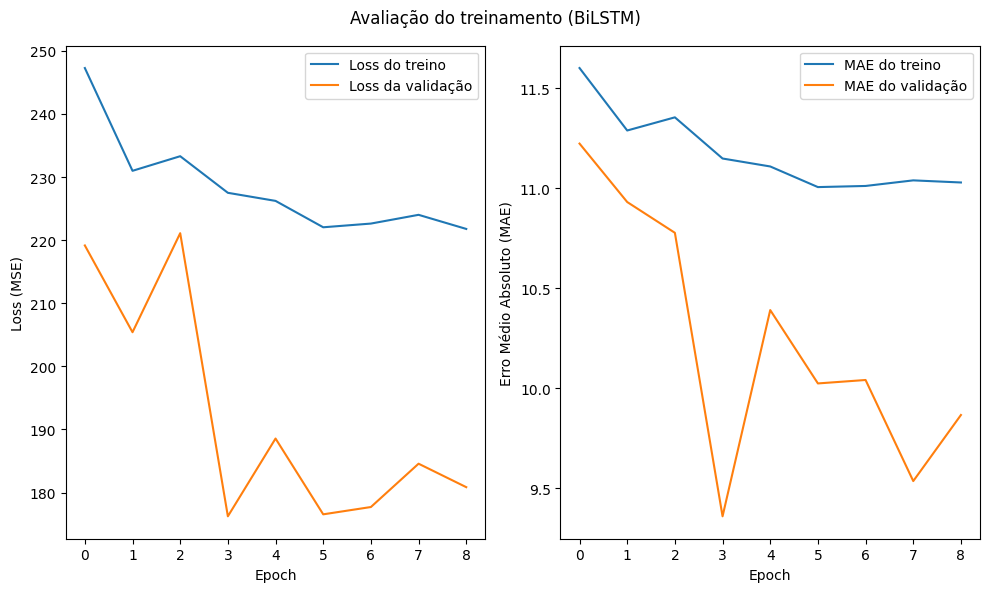

In [56]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=best_model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [57]:
##Testando o modelo com os dados de teste

In [58]:
rul_prev = best_model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 45s 135ms/step


In [59]:
##Avaliando o modelo

235.76066727810198
15.35
0.12265430381392704
11.748655665617637
0.7619386332779535
Tempo de 4989.669456243515s


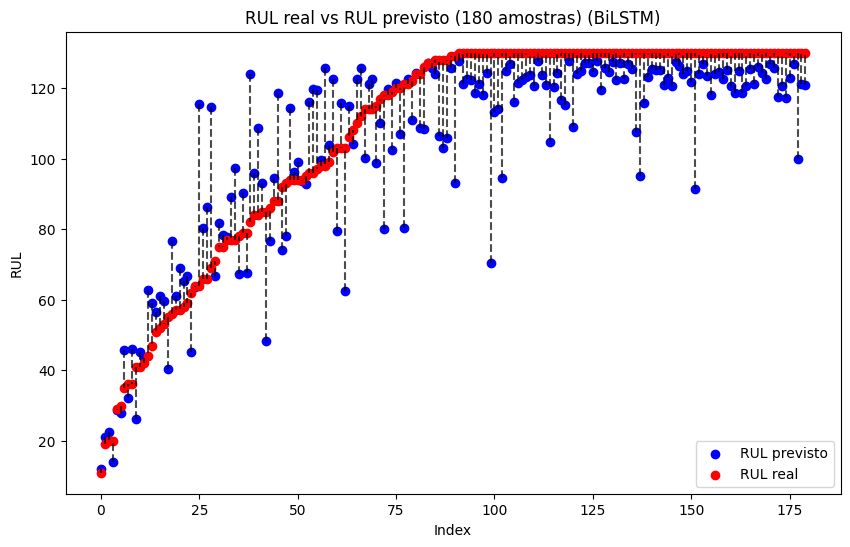

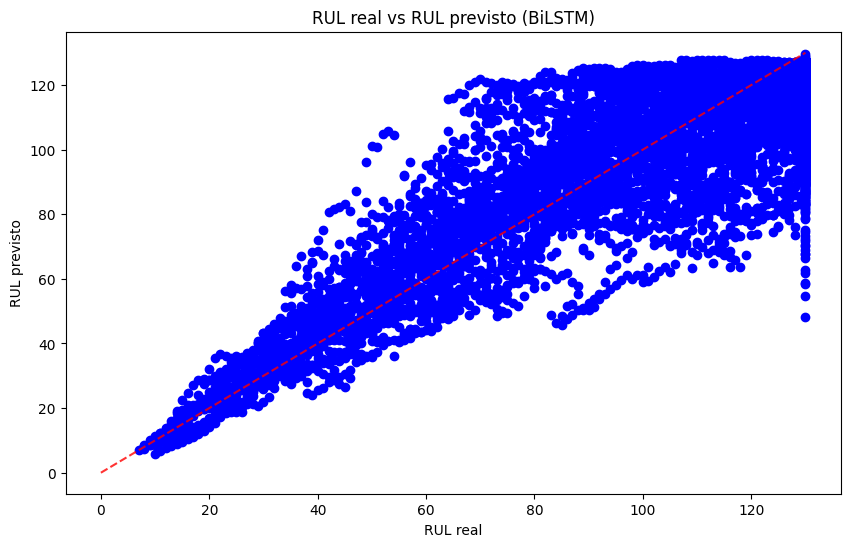

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()